# Задание

Разведочный анализ данных
1. Загрузить набор данных для анализа. Например, данные по мировому населению
    (https://www.kaggle.com/datasets/iamsouravbanerjee/world-population
    dataset?datasetId=2432740&sortBy=voteCount) как датафрейм библиотеки pandas.
    Конкретный dataset выбрать самостоятельно.
2. Получить представлении о наборе данных с помощью методов shape, head, describe,
    info библиотеки pandas.
3. Произвести разведочный анализ данных по данному набору данных – визуализировать
    данные с помощью библиотек matplotlib, seaborn, plotly.
    Построить: 
    - Парные диаграммы (pairplots)
    - Тепловую карту по матрице корреляции
    - Диаграммы рассеяния
    - Сводные диаграммы
    - Гистограммы
    - Ящик с усами (диаграмма размаха)
    - Скрипичные диаграммы
4. На основе выполненного анализа данных произвести выводы о динамике изменения
населения по регионам, процентном соотношении населения по регионам. Выявить
корреляцию между признаками

# Ход работы

## Используемые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry

## Чтение данных из CSV файла

Файл содержит информацию о ВВП стран мира по годам

In [2]:
data = pd.read_csv("gdp.csv")

### Размерность датасета

In [3]:
data.shape

(13979, 4)

### Первые 10 строк датасета

In [4]:
data.head(10)

,Country Name,Country Code,Year,Value
0,Afghanistan,AFG,2000,3.521418e+09
1,Afghanistan,AFG,2001,2.813572e+09
2,Afghanistan,AFG,2002,3.825701e+09
3,Afghanistan,AFG,2003,4.520947e+09
4,Afghanistan,AFG,2004,5.224897e+09
5,Afghanistan,AFG,2005,6.203257e+09
6,Afghanistan,AFG,2006,6.971758e+09
7,Afghanistan,AFG,2007,9.747886e+09
8,Afghanistan,AFG,2008,1.010930e+10
9,Afghanistan,AFG,2009,1.241615e+10


### Информация о датафрейме

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13979 entries, 0 to 13978
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  13979 non-null  object 
 1   Country Code  13979 non-null  object 
 2   Year          13979 non-null  int64  
 3   Value         13979 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 437.0+ KB


### Статистический анализ числовых характеристик датасета

Для примера проанализирован ВВП всех стран за 2022 год

In [6]:
data2022 = data[data["Year"] == 2022]
data2022["Value"].describe()

count    2.500000e+02
mean     3.344889e+12
std      1.116573e+13
min      5.906598e+07
25%      1.313119e+10
50%      7.059355e+10
75%      7.862607e+11
max      1.012251e+14
Name: Value, dtype: float64

### Количество пустых строк

In [7]:
data.isnull().sum()

Country Name    0
Country Code    0
Year            0
Value           0
dtype: int64

## Диаграммы для 10 стран с самым большим ВВП на 2022 год

### Извлечение датасета

In [8]:
codes = [country.alpha_3 for country in pycountry.countries]
countries = data2022[data2022["Country Code"].isin(codes)] \
    .sort_values(by="Value", ascending=False) \
    .head(10)

top_country_codes = [country for country in countries["Country Code"]]
top_country_codes

['USA', 'CHN', 'JPN', 'DEU', 'IND', 'GBR', 'FRA', 'RUS', 'CAN', 'ITA']

In [9]:
data = data[data["Country Code"].isin(top_country_codes)]
data

,Country Name,Country Code,Year,Value
1912,Canada,CAN,1960,4.056377e+10
1913,Canada,CAN,1961,4.103819e+10
1914,Canada,CAN,1962,4.233621e+10
1915,Canada,CAN,1963,4.514034e+10
1916,Canada,CAN,1964,4.950366e+10
...,...,...,...,...
13399,United States,USA,2019,2.152140e+13
13400,United States,USA,2020,2.132295e+13
13401,United States,USA,2021,2.359403e+13
13402,United States,USA,2022,2.574411e+13


### Парные диаграммы

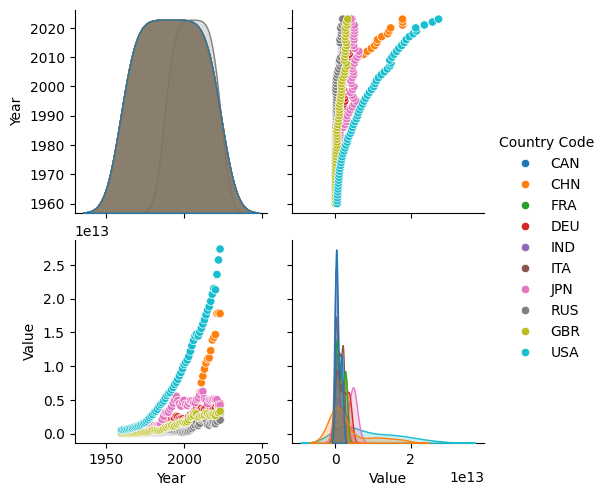

In [10]:
sns.pairplot(data, hue="Country Code")

### Тепловая карта корреляции

<Axes: >

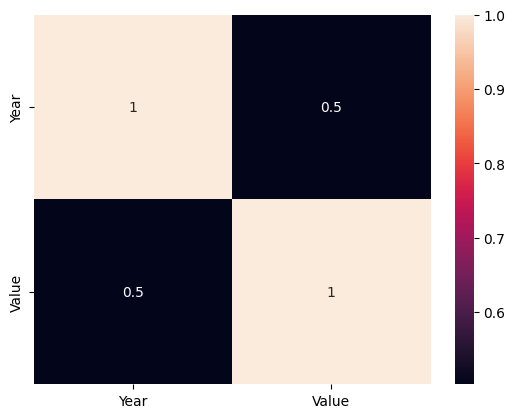

In [11]:
heatmap_data = data[["Year", "Value"]] \
    .corr()
sns.heatmap(heatmap_data, annot=True)

### Диаграмма рассеяния

<Axes: xlabel='Year', ylabel='Value'>

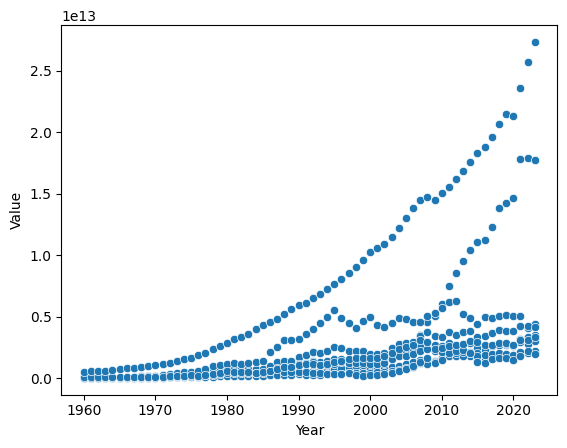

In [12]:
sns.scatterplot(data, x="Year", y="Value")

### Сводная диаграмма ВВП на 2022 год

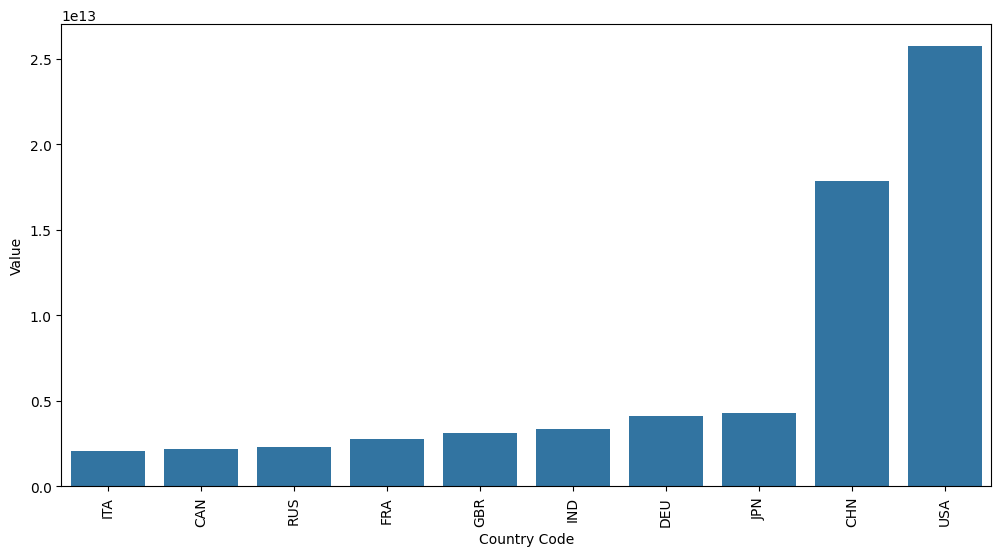

In [17]:
data_sums = data[data["Year"] == 2022].sort_values(by="Value")

plt.figure(figsize=(12, 6))
sns.barplot(data_sums, x="Country Code", y="Value", orient="x")
plt.xticks(rotation=90)
plt.show()

## Диаграммы для ВВП всех стран на 2022 год

### Гистограмма распределения

<Axes: xlabel='Value', ylabel='Count'>

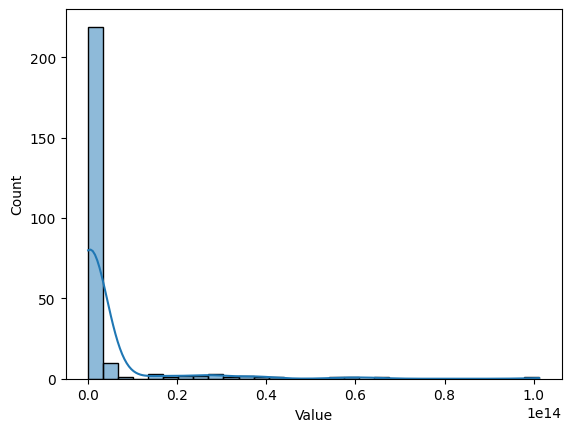

In [14]:

sns.histplot(data2022['Value'], bins=30, kde=True)

### Диаграмма размаха

<Axes: xlabel='Value'>

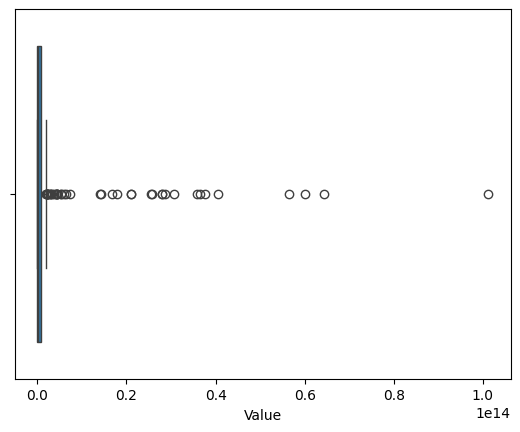

In [15]:
sns.boxplot(x=data2022['Value'])

### Скрипичная диаграмма

<Axes: xlabel='Value'>

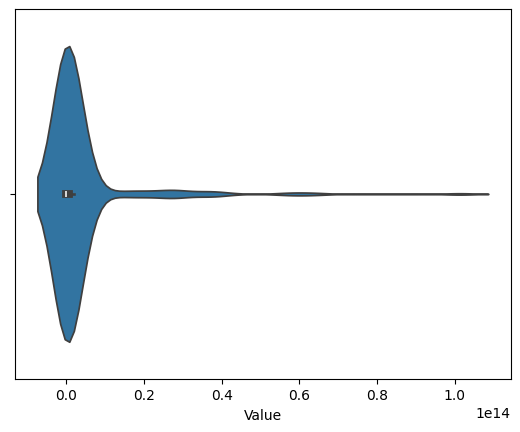

In [16]:
sns.violinplot(x=data2022['Value'])

# Выводы

С помощью языка Python и библиотек pandas, matplotlib и seaborn выполнен анализ ВВП для всех стран мира по годам.
Полученные релузьтаты показывают следующие выводы:

- В 2022 году Россия заняла 8 место по размеру ВВП
- США и Китай - страны, развивающиеся стремительнее всех остальных
- ВВП большинства стран лежит в пределах до 1 триллиона долларов США

Использованный набор инструментов отлично подходит для задач, связанных со статистикой и анализом больших данных.